In [1]:
import os
import json
import csv
import random
import numpy as np
import pandas as pd
from time import perf_counter
from PIL import Image

In [3]:
## if mount in google colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# GOOGLE_COLAB_DRIVE_FOLDER = '/content/drive/MyDrive/Colab Notebooks/proj5'
# PATH = GOOGLE_COLAB_DRIVE_FOLDER

In [5]:
# print current directory
# os.chdir("/content/drive/MyDrive/Colab Notebooks/proj5") # in google colab
print(os.getcwd())
current_directory = os.getcwd()
folder_name = "BertResNet"
if os.path.basename(current_directory) == folder_name:
    print("当前文件夹是名称为 'BertResNet' 的文件夹")
else:
    print("当前文件夹不是名称为 'BertResNet' 的文件夹，请切换后再执行下述代码块")
# change the running directory to the current direc
os.chdir(os.getcwd())

/Users/tangyue/JupyterProjects/CurrentAI/BertResNet
当前文件夹是名称为 'BertResNet' 的文件夹


## Read in dataset

### Read text and image

In [6]:
# Data folder
HOME_FOLDER = os.getcwd()
DATA_FOLDER = HOME_FOLDER + '/data'
IMG_FOLDER = HOME_FOLDER
SENTENCE_FOLDER = DATA_FOLDER + '/sentence/'
RESULTS_FOLDER = HOME_FOLDER + '/results/'
TRAIN_DATA_LABEL = './train.txt'
os.makedirs(RESULTS_FOLDER, exist_ok=True)

In [8]:
# check if the train.csv exist
if not os.path.exists(HOME_FOLDER + '/train.csv'):
    print('train.csv not found.')
    print('[INFO: please fill the os.chdir(<your-absolute-path>) in the above block again to make the path right')
else:
    print('[INFO]: train.csv exist in correct path')
# check if theval.csv exist
if not os.path.exists(HOME_FOLDER + '/val.csv'):
    print('val.csv not found.')
    print('[INFO: please fill the os.chdir(<your-absolute-path>) in the above block again to make the path right')
else:
    print('[INFO]: val.csv exist in correct path')
# check if the test.csv exist
if not os.path.exists(HOME_FOLDER + '/test.csv'):
    print('test.csv not found.')
    print('[INFO: please fill the os.chdir(<your-absolute-path>) in the above block again to make the path right')
else:
    print('[INFO]: test.csv exist in correct path')

[INFO]: train.csv exist in correct path
[INFO]: val.csv exist in correct path
[INFO]: test.csv exist in correct path


In [10]:
# read in train and test from csv
df_train = pd.read_csv(HOME_FOLDER + '/train.csv')
df_train

,text_id,text,img_path,tag
0,1,How I feel today #legday #jelly #aching #gym \n,data/img/1.jpg,positive
1,2,grattis min griskulting!!!???? va bara tvungen...,data/img/2.jpg,positive
2,3,RT @polynminion: The moment I found my favouri...,data/img/3.jpg,positive
3,4,#escort We have a young and energetic team and...,data/img/4.jpg,positive
4,6,"RT @babeshawnmendes: ""that was really energeti...",data/img/6.jpg,positive
...,...,...,...,...
3995,5124,http://t.co/V4ln4Hvfkx http://t.co/IaXL8Rzy1R\n,data/img/5124.jpg,negative
3996,5125,http://t.co/Y4ZrSmq2KB http://t.co/L¡­\n,data/img/5125.jpg,positive
3997,5126,YES! #sinful #food #freefrom #glutenfree #suga...,data/img/5126.jpg,positive
3998,5128,RT @MUBMI: TWO MORE DAYS to submit your apps #...,data/img/5128.jpg,positive


1. Split train dataset into train dataset and validation dataset

In [11]:
from sklearn.model_selection import train_test_split
# Splitting df_train into df_train and df_dev
df_train, df_dev = train_test_split(df_train, test_size=0.2, random_state=42)

In [12]:
df_dev.to_csv(HOME_FOLDER + '/val.csv', index=False)
df_dev

,text_id,text,img_path,tag
555,676,#Silence by AndreiTudoran - #B?r #Bars #Buildi...,data/img/676.jpg,negative
3491,4520,Well @JamieLaing_UK these get a huge thumbs up...,data/img/4520.jpg,positive
527,644,RT @katumberbatch: What a pile of bullshit! Ho...,data/img/644.jpg,positive
3925,5042,RT @bestpmorepics: http://t.co/NbJLGlK37b\n,data/img/5042.jpg,positive
2989,3924,RT @Michael1979: I am 100% worried today. Here...,data/img/3924.jpg,negative
...,...,...,...,...
1922,2530,I drew Homer Simpson one night at Crabby Joe's...,data/img/2530.jpg,positive
865,1031,"Congrats, Ladies! #strong #awesome RT @Harvard...",data/img/1031.jpg,positive
3943,5063,"MP, not at all rattled... http://t.co/ZE57yvdH...",data/img/5063.jpg,positive
1642,1980,"Happy Valentine to this beautiful, kind, and c...",data/img/1980.jpg,positive


In [13]:
df_test = pd.read_csv(HOME_FOLDER + '/test.csv')
df_test

,text_id,text,img_path,tag
0,8,Energetic training today with our San Antonio ...,data/img/8.jpg,NaN
1,1576,Let your voice be heard! 18+ #endsuicide #blit...,data/img/1576.jpg,NaN
2,2320,RT @Austin_Powers__: Shark Week would be so mu...,data/img/2320.jpg,NaN
3,4912,#TheTruthCaster http://t.co/S8jvqpKq5h\n,data/img/4912.jpg,NaN
4,3821,RT @jarpad: Hey #WBSDCC look what we're up to!...,data/img/3821.jpg,NaN
...,...,...,...,...
506,1048,??? #stunned #sunglasses #gafas #gafasdesol \n,data/img/1048.jpg,NaN
507,1059,Seeing @nbdbnb in a few days #excited #or #ter...,data/img/1059.jpg,NaN
508,1485,And the #dragon guarding our #heart is called ...,data/img/1485.jpg,NaN
509,3195,RT @NWSAlbuquerque: Isolated strong to severe ...,data/img/3195.jpg,NaN


2. Instance of the dataset

In [14]:
import matplotlib.pyplot as plt
# show the image example
def show_sample(row_num):
    sample_row = df_train.iloc[row_num]
    print('Index: ', row_num)
    print('Text id: ', sample_row['text_id'])
    print('Label: ', sample_row['tag'])
    print('Text: ', sample_row['text'])
    print('Img: ')
    im = Image.open(IMG_FOLDER + '/' + sample_row['img_path'])
    plt.imshow(im)

see one example of the dataset

Index:  2764
Text id:  4642
Label:  positive
Text:  RT @TeamSheeranBRA: VOTE.....EM UMA HORA ACABA http://t.co/EObHI27a4U  #FanArmyFaceOff #Sheerios http://t.co/iTEH5LRXaM

Img: 


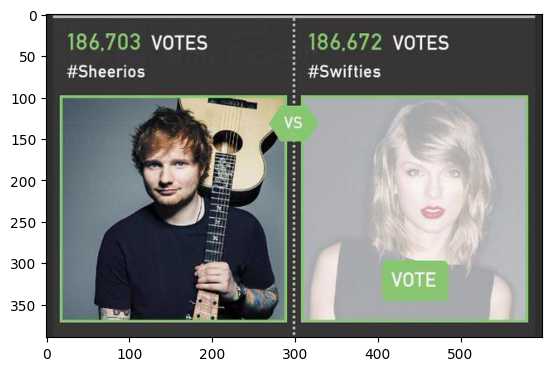

In [16]:
# See one instance of the image
from random import randint
show_sample(randint(0, len(df_train)))

In [17]:
label_to_id = {lab:i for i, lab in enumerate(df_train['tag'].sort_values().unique())}
id_to_label = {v:k for k,v in label_to_id.items()}
num_label = len(label_to_id)
print(num_label)
label_to_id

3


{'negative': 0, 'neutral': 1, 'positive': 2}

#### Test dataframe

In [18]:
df_test

,text_id,text,img_path,tag
0,8,Energetic training today with our San Antonio ...,data/img/8.jpg,NaN
1,1576,Let your voice be heard! 18+ #endsuicide #blit...,data/img/1576.jpg,NaN
2,2320,RT @Austin_Powers__: Shark Week would be so mu...,data/img/2320.jpg,NaN
3,4912,#TheTruthCaster http://t.co/S8jvqpKq5h\n,data/img/4912.jpg,NaN
4,3821,RT @jarpad: Hey #WBSDCC look what we're up to!...,data/img/3821.jpg,NaN
...,...,...,...,...
506,1048,??? #stunned #sunglasses #gafas #gafasdesol \n,data/img/1048.jpg,NaN
507,1059,Seeing @nbdbnb in a few days #excited #or #ter...,data/img/1059.jpg,NaN
508,1485,And the #dragon guarding our #heart is called ...,data/img/1485.jpg,NaN
509,3195,RT @NWSAlbuquerque: Isolated strong to severe ...,data/img/3195.jpg,NaN


### Training hyperparameters

In [19]:
# training parameters to be used for all models ##
num_train_epochs = 50
batch_size = 4
learning_rate = 1.0e-5
weight_decay = 0.01
warmup_steps = 0
max_seq_length = df_train['text'].apply(len).max() # TODO: need to be modify if not obliged to the model requirements
print(f"Hyperparameters \nepoch: {num_train_epochs}\nbatch_size: {batch_size}\nlr: {learning_rate}\nweight_decay: {weight_decay}\nwarmup_steps: {warmup_steps}\nmax_seq_length: {max_seq_length}"
)

Hyperparameters 
epoch: 50
batch_size: 4
lr: 1e-05
weight_decay: 0.01
warmup_steps: 0
max_seq_length: 258


## Text-Model BERT

In [20]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 119.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 124.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.4 MB/s eta 0:00:00


In [21]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, classification_report
from transformers import AutoModel, AutoTokenizer, get_scheduler
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import AdamW
from tqdm.notebook import tqdm, trange

# BERT + ResNet50

In [22]:
def set_seed(seed_val):
    random.seed(seed_val)
    np.random.seed(seed_val)
    torch.manual_seed(seed_val)
    torch.cuda.manual_seed_all(seed_val)

In [23]:
class TextDataset(Dataset):
    def __init__(self, df, label_to_id, text_field="text", label_field="tag"):
        self.df = df.reset_index(drop=True)
        self.label_to_id = label_to_id
        self.text_field = text_field
        self.label_field = label_field

    def __getitem__(self, index):
        text = str(self.df.at[index, self.text_field])
        label = self.label_to_id.get(self.df.at[index, self.label_field], -1)
        # self.label_to_id[self.df.at[index, self.label_field]] if self.df.at[index, self.label_field] is nan

        return text, label

    def __len__(self):
        return self.df.shape[0]

In [24]:
class VLBertModel(nn.Module):

    def __init__(self, num_labels, text_pretrained='bert-base-uncased'):
        super().__init__()

        self.num_labels = num_labels
        self.text_encoder = AutoModel.from_pretrained(text_pretrained)
        self.classifier = nn.Linear(
            self.text_encoder.config.hidden_size, num_labels)


    def forward(self, text):
        output = self.text_encoder(text.input_ids, attention_mask=text.attention_mask, return_dict=True)
        logits = self.classifier(output.last_hidden_state[:, 0, :]) # CLS embedding
        return logits

In [25]:
class ResNetDataset(Dataset):
    def __init__(self, df, label_to_id, train=False, text_field="text", label_field="tag", image_path_field="img_path"):
        self.df = df.reset_index(drop=True)
        self.label_to_id = label_to_id
        self.train = train
        self.text_field = text_field
        self.label_field = label_field
        self.image_path_field = image_path_field

        # ResNet-50 settings
        self.img_size = 224
        self.mean, self.std = (
            0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)


        self.train_transform_func = transforms.Compose(
                [transforms.RandomResizedCrop(self.img_size, scale=(0.5, 1.0)),
                    transforms.RandomHorizontalFlip(),
                    transforms.ToTensor(),
                    transforms.Normalize(self.mean, self.std)
                    ])

        self.eval_transform_func = transforms.Compose(
                [transforms.Resize(256),
                    transforms.CenterCrop(self.img_size),
                    transforms.ToTensor(),
                    transforms.Normalize(self.mean, self.std)
                    ])


    def __getitem__(self, index):
        text = str(self.df.at[index, self.text_field])
        label = self.label_to_id.get(self.df.at[index, self.label_field], -1)
        # self.label_to_id[self.df.at[index, self.label_field]]
        img_path = self.df.at[index, self.image_path_field]


        image = Image.open(IMG_FOLDER + '/' + img_path)
        if self.train:
          img = self.train_transform_func(image)
        else:
          img = self.eval_transform_func(image)

        return text, label, img

    def __len__(self):
        return self.df.shape[0]

In [26]:
# extract layers of resnet-50 to build a new model
import torch.nn as nn
from torchvision.models.resnet import resnet50

class ResNetFeatureModel(nn.Module):
    def __init__(self, output_layer):
        super().__init__()
        self.output_layer = output_layer
        pretrained_resnet = resnet50(pretrained=True)
        self.children_list = []
        for n,c in pretrained_resnet.named_children():
            self.children_list.append(c)
            if n == self.output_layer:
                break

        self.net = nn.Sequential(*self.children_list)


    def forward(self,x):
        x = self.net(x)
        x = torch.flatten(x, 1)
        return x

In [27]:
class ResNetModel(nn.Module):
    def __init__(self, num_labels):
        super().__init__()
        self.visual_encoder = ResNetFeatureModel(output_layer='avgpool')
        self.image_hidden_size = 2048

        self.classifier = nn.Linear(self.image_hidden_size, num_labels)

    def forward(self, text, image):
        img_feature = self.visual_encoder(image)
        features = torch.cat((img_feature), 1)

        logits = self.classifier(features)

        return logits

In [28]:
class TwoInputMLP(nn.Module):
    def __init__(self, input_size1, input_size2, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size1 + input_size2, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [29]:
class BertResNetModel(nn.Module):
    def __init__(self, num_labels, text_pretrained='bert-base-uncased', hidden_size=512):
        super().__init__()
        self.text_encoder = AutoModel.from_pretrained(text_pretrained)
        self.visual_encoder = ResNetFeatureModel(output_layer='avgpool')
        self.image_hidden_size = 2048
        self.mlp_text = nn.Linear(self.text_encoder.config.hidden_size, num_labels)
        self.mlp_image = nn.Linear(self.image_hidden_size, num_labels)
        self.mlp_both = TwoInputMLP(self.text_encoder.config.hidden_size, self.image_hidden_size, hidden_size, num_labels)

    def forward(self, text, image, mode='both'):
        text_output = self.text_encoder(**text)
        text_feature = text_output.last_hidden_state[:, 0, :]
        img_feature = self.visual_encoder(image)

        if mode == 'text':
            logits = self.mlp_text(text_feature)
        elif mode == 'image':
            logits = self.mlp_image(img_feature)
        else:  # 'both'
            logits = self.mlp_both(text_feature, img_feature)

        return logits

In [40]:
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [45]:
tokenizer_path = bert_tokenizer.save_pretrained('/content/drive/MyDrive/Colab Notebooks/proj5')
print(tokenizer_path)

('/content/drive/MyDrive/Colab Notebooks/proj5/tokenizer_config.json', '/content/drive/MyDrive/Colab Notebooks/proj5/special_tokens_map.json', '/content/drive/MyDrive/Colab Notebooks/proj5/vocab.txt', '/content/drive/MyDrive/Colab Notebooks/proj5/added_tokens.json', '/content/drive/MyDrive/Colab Notebooks/proj5/tokenizer.json')


In [31]:
# use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# create the model
bert_model = VLBertModel(num_labels=num_label, text_pretrained='bert-base-uncased')
bert_model = bert_model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [32]:
bert_resnet_model = BertResNetModel(num_labels=num_label, text_pretrained='bert-base-uncased')
bert_resnet_model = bert_resnet_model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weig

## training

In [33]:
def run_bert_resnet_model(epochs, mode='both'):
  num_train_epochs = epochs
  seed_val = 42
  set_seed(seed_val)

  ## training loop
  set_seed(seed_val)

  train_dataset = ResNetDataset(df=df_train, label_to_id=label_to_id, train=True, text_field='text', label_field='tag', image_path_field='img_path')
  train_sampler = RandomSampler(train_dataset)
  train_dataloader = DataLoader(dataset=train_dataset,
                      batch_size=batch_size,
                      sampler=train_sampler)


  t_total = len(train_dataloader) * num_train_epochs


  optimizer = AdamW(bert_resnet_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
  scheduler = get_scheduler(name="cosine", optimizer=optimizer, num_warmup_steps=warmup_steps, num_training_steps=t_total)

  criterion = nn.CrossEntropyLoss()

  bert_resnet_model.train()

  start = perf_counter()
  for epoch_num in trange(num_train_epochs, desc='Epochs'):
      epoch_total_loss = 0

      for step, batch in tqdm(enumerate(train_dataloader), total=len(train_dataloader), desc='Batch'):
          b_text, b_labels, b_imgs = batch
          b_inputs = bert_tokenizer(
              list(b_text), truncation=True, max_length=max_seq_length,
              return_tensors="pt", padding=True
          )

          b_labels = b_labels.to(device)
          b_imgs = b_imgs.to(device)
          b_inputs = b_inputs.to(device)

          bert_resnet_model.zero_grad()
          # b_logits = resnet_model(text=b_inputs, image=b_imgs)
          b_logits = bert_resnet_model(text=b_inputs, image=b_imgs, mode='both')

          loss = criterion(b_logits, b_labels)

          epoch_total_loss += loss.item()

          # Perform a backward pass to calculate the gradients
          loss.backward()


          optimizer.step()
          scheduler.step()

      avg_loss = epoch_total_loss/len(train_dataloader)


      print('epoch =', epoch_num)
      print('    epoch_loss =', epoch_total_loss, end="\t")
      print('    avg_epoch_loss =', avg_loss, end="\t")
      print('    learning rate =', optimizer.param_groups[0]["lr"], end="\t")
  end = perf_counter()
  resnet_training_time = end- start
  print()

# Validation

In [34]:
def validate_bert_resnet(mode='both', file_download=False):
  resnet_validation_results = []

  val_dataset = ResNetDataset(df=df_dev, label_to_id=label_to_id, train=False, text_field='text', label_field='tag', image_path_field='img_path')
  val_sampler = SequentialSampler(val_dataset)
  val_dataloader = DataLoader(dataset=val_dataset,
                              batch_size=batch_size,
                              sampler=val_sampler)


  for batch in tqdm(val_dataloader):
    bert_resnet_model.eval()

    b_text, b_labels, b_imgs = batch

    b_inputs = bert_tokenizer(list(b_text), truncation=True, max_length=max_seq_length, return_tensors="pt", padding=True)

    b_labels = b_labels.to(device)
    b_imgs = b_imgs.to(device)
    b_inputs = b_inputs.to(device)

    with torch.no_grad():
      b_logits = bert_resnet_model(text=b_inputs, image=b_imgs, mode=mode)
      b_logits = b_logits.detach().cpu()

    resnet_validation_results += torch.argmax(b_logits, dim=-1).tolist()

  resnet_validation_labels = [id_to_label[p] for p in resnet_validation_results]
  resnet_class_report_val = classification_report(df_dev['tag'], resnet_validation_labels, output_dict=True)
  print(resnet_class_report_val['accuracy'])
  if file_download is True:
    with open(RESULTS_FOLDER + 'resnet_class_report.json', 'w') as f:
      json.dump(resnet_class_report_val, f)

# Train and Test model

## Only text feature

In [48]:
run_bert_resnet_model(epochs=1, mode='text')
validate_bert_resnet('text')

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/800 [00:00<?, ?it/s]

epoch = 0
    epoch_loss = 12.752097121108818	    avg_epoch_loss = 0.015940121401386023	    learning rate = 0.0	


  0%|          | 0/200 [00:00<?, ?it/s]

0.41125


### Only img feature

In [ ]:
run_bert_resnet_model(epochs=1, mode='img')

# validate_bert_resnet('img')

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Batch:   0%|          | 0/200 [00:00<?, ?it/s]

epoch = 0
    epoch_loss = 0.7862971066824684	    avg_epoch_loss = 0.003931485533412342	    learning rate = 0.0	


In [ ]:
validate_bert_resnet('img')

  0%|          | 0/50 [00:00<?, ?it/s]

0.73


### Text and img feature

In [36]:
torch.cuda.empty_cache()

In [50]:
run_bert_resnet_model(epochs=5, mode='both')
validate_bert_resnet('both')

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/800 [00:00<?, ?it/s]

epoch = 0
    epoch_loss = 17.710258989719478	    avg_epoch_loss = 0.022137823737149346	    learning rate = 9.045084971874738e-06	

Batch:   0%|          | 0/800 [00:00<?, ?it/s]

epoch = 1
    epoch_loss = 26.441611493497476	    avg_epoch_loss = 0.03305201436687184	    learning rate = 6.545084971874738e-06	

Batch:   0%|          | 0/800 [00:00<?, ?it/s]

epoch = 2
    epoch_loss = 17.40337480641483	    avg_epoch_loss = 0.02175421850801854	    learning rate = 3.4549150281252635e-06	

Batch:   0%|          | 0/800 [00:00<?, ?it/s]

epoch = 3
    epoch_loss = 12.970532783936505	    avg_epoch_loss = 0.016213165979920632	    learning rate = 9.549150281252633e-07	

Batch:   0%|          | 0/800 [00:00<?, ?it/s]

epoch = 4
    epoch_loss = 35.65509596312131	    avg_epoch_loss = 0.04456886995390164	    learning rate = 0.0	


  0%|          | 0/200 [00:00<?, ?it/s]

0.7125


## Testing

In [38]:
# testing loop

resnet_prediction_results = []

test_dataset = ResNetDataset(df=df_test, label_to_id=label_to_id, train=False, text_field='text', label_field='tag', image_path_field='img_path')
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(dataset=test_dataset,
                            batch_size=batch_size,
                            sampler=test_sampler)


for batch in tqdm(test_dataloader):
  bert_resnet_model.eval()

  b_text, b_labels, b_imgs = batch

  b_inputs = bert_tokenizer(list(b_text), truncation=True, max_length=max_seq_length, return_tensors="pt", padding=True)

  b_labels = b_labels.to(device)
  b_imgs = b_imgs.to(device)
  b_inputs = b_inputs.to(device)

  with torch.no_grad():
      b_logits = bert_resnet_model(text=b_inputs, image=b_imgs)
      b_logits = b_logits.detach().cpu()

  resnet_prediction_results += torch.argmax(b_logits, dim=-1).tolist()

resnet_prediction_labels = [id_to_label[p] for p in resnet_prediction_results]

  0%|          | 0/128 [00:00<?, ?it/s]

In [39]:
# write the predict label into back into csv file
for i, label in enumerate(resnet_prediction_labels):
    df_test.at[i, 'tag'] = label
df_test.to_csv(HOME_FOLDER  + '/' + 'bert-resnet_prediction.csv', index=False)
df_test

,text_id,text,img_path,tag
0,8,Energetic training today with our San Antonio ...,data/img/8.jpg,positive
1,1576,Let your voice be heard! 18+ #endsuicide #blit...,data/img/1576.jpg,negative
2,2320,RT @Austin_Powers__: Shark Week would be so mu...,data/img/2320.jpg,positive
3,4912,#TheTruthCaster http://t.co/S8jvqpKq5h\n,data/img/4912.jpg,negative
4,3821,RT @jarpad: Hey #WBSDCC look what we're up to!...,data/img/3821.jpg,positive
...,...,...,...,...
506,1048,??? #stunned #sunglasses #gafas #gafasdesol \n,data/img/1048.jpg,negative
507,1059,Seeing @nbdbnb in a few days #excited #or #ter...,data/img/1059.jpg,positive
508,1485,And the #dragon guarding our #heart is called ...,data/img/1485.jpg,negative
509,3195,RT @NWSAlbuquerque: Isolated strong to severe ...,data/img/3195.jpg,negative
